In [4]:
import pandas as pd
import numpy as np

In [5]:
loan_data = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_21944\3147310615.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan_data_2007_2014.csv')


In [6]:
pd.options.display.max_columns =None

In [7]:
loan_data['emp_length'].unique()
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

C:\Users\HP\AppData\Local\Temp\ipykernel_21944\3913292143.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')


In [8]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
loan_data['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [9]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
loan_data['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [10]:
loan_data['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))
loan_data['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

In [11]:
loan_data['months_since_earliest_cr_line'][loan_data['months_since_earliest_cr_line']<0] = loan_data['months_since_earliest_cr_line'].max()
loan_data['months_since_earliest_cr_line'].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_21944\4261490438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['months_since_earliest_cr_line'][loan_data['months_since_earliest_cr_line']<0] = loan_data['months_since_earliest_cr_line'].max()


count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

In [12]:
loan_data['term_int'] = loan_data['term'].str.replace(' ','')
loan_data['term_int'] = loan_data['term_int'].str.replace('months','')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

In [13]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['months_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_date'])/np.timedelta64(1,'M')))
loan_data['months_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: months_since_issue_d, dtype: float64

In [14]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix ='grade', prefix_sep=':'),
                    pd.get_dummies(loan_data['sub_grade'], prefix ='sub_grade', prefix_sep=':'),
                    pd.get_dummies(loan_data['home_ownership'], prefix ='home_ownership', prefix_sep=':'),
                    pd.get_dummies(loan_data['verification_status'], prefix ='verification_status', prefix_sep=':'),
                    pd.get_dummies(loan_data['loan_status'], prefix ='loan_status', prefix_sep=':'),
                    pd.get_dummies(loan_data['purpose'], prefix ='purpose', prefix_sep=':'),
                    pd.get_dummies(loan_data['addr_state'], prefix ='addr_state', prefix_sep=':'),
                    pd.get_dummies(loan_data['initial_list_status'], prefix ='initial_list_status', prefix_sep=':')]

In [15]:
loan_data_dummies = pd.concat(loan_data_dummies,axis = 1)
loan_data = pd.concat([loan_data,loan_data_dummies],axis = 1)

In [16]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [17]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].dropna().mean(),inplace=True)
loan_data['months_since_earliest_cr_line'].fillna(0,inplace=True)
loan_data['acc_now_delinq'].fillna(0,inplace=True)
loan_data['total_acc'].fillna(0,inplace=True)
loan_data['pub_rec'].fillna(0,inplace=True)
loan_data['open_acc'].fillna(0,inplace=True)
loan_data['inq_last_6mths'].fillna(0,inplace=True)
loan_data['delinq_2yrs'].fillna(0,inplace=True)
loan_data['emp_length_int'].fillna(0,inplace=True)

In [18]:
#loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']),0,1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
ldi_train, ldi_test, ldt_train, ldt_test = train_test_split(loan_data.drop('good_bad', axis = 1),loan_data['good_bad'])

In [21]:
def woe_discreet(df,discreet_variable_name,target_variable):
    
    df1 = pd.concat([ldi_train[discreet_variable_name],target_variable], axis =1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                    df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].mean()],axis=1)
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns[0],'n_obs','prop_good']
    df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
    df1['n_good'] = df1['prop_good']*df1['n_obs']
    df1['n_bad'] = (1-df1['prop_good'])*df1['n_obs']
    df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
    df1['woe'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
    df1 = df1.sort_values(['woe'])
    df1 = df1.reset_index(drop=True)
    df1['diff_woe'] = df1['woe'].diff().abs()
    df1['iv'] = (df1['prop_n_good']-df1['prop_n_bad'])*df1['woe']
    df1['iv'] = df1['iv'].sum()
    
    return df1

In [22]:
df_temp = woe_discreet(ldi_train.copy(),'grade',ldt_train)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,woe,diff_woe,iv
0,G,2470,0.732389,0.007063,1809.0,661.0,0.005804,0.017392,-1.097573,NaN,0.29059
1,F,9848,0.757514,0.028160,7460.0,2388.0,0.023933,0.062834,-0.965250,0.132324,0.29059
2,E,26936,0.807915,0.077023,21762.0,5174.0,0.069815,0.136140,-0.667830,0.297420,0.29059
3,D,57627,0.846426,0.164784,48777.0,8850.0,0.156483,0.232864,-0.397508,0.270322,0.29059
4,C,94050,0.884955,0.268935,83230.0,10820.0,0.267013,0.284699,-0.064138,0.333370,0.29059
5,B,102591,0.922566,0.293358,94647.0,7944.0,0.303640,0.209025,0.373388,0.437526,0.29059
6,A,56191,0.961417,0.160677,54023.0,2168.0,0.173313,0.057045,1.111256,0.737868,0.29059


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [24]:
def plot_woe(df_woe,rot_x_ax_lab=0):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['woe']
    plt.figure(figsize=(18,6))
    plt.plot(x,y, marker = 'o', linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of evidence')
    plt.xticks(rotation = rot_x_ax_lab)   

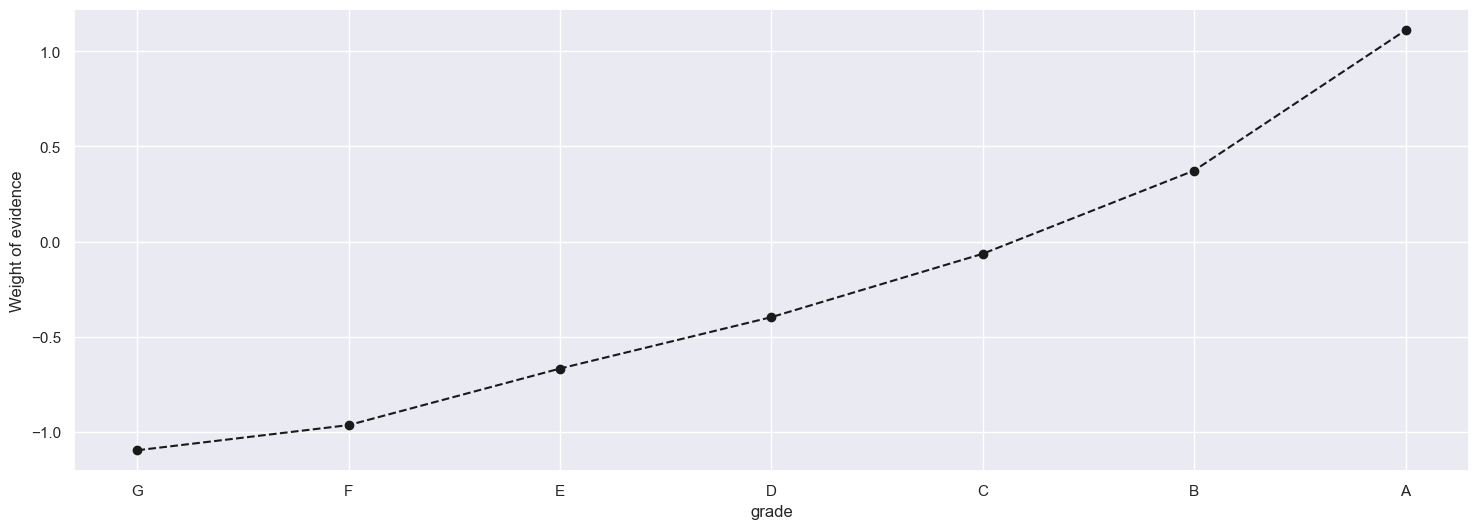

In [25]:
plot_woe(df_temp)

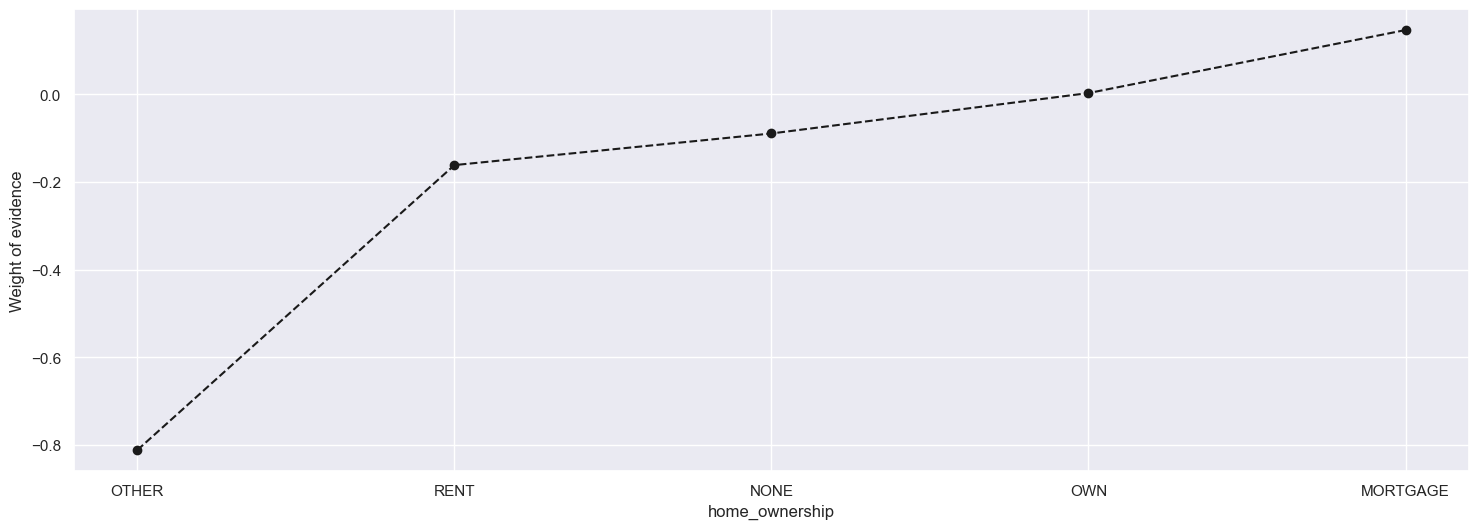

In [26]:
df_temp = woe_discreet(ldi_train.copy(),'home_ownership',ldt_train)
plot_woe(df_temp)

In [27]:
ldi_train['home_ownership:RENT_OTHER_NONE_ANY'] = sum([ldi_train['home_ownership:RENT'],ldi_train['home_ownership:OTHER'],
                                                     ldi_train['home_ownership:NONE'],ldi_train['home_ownership:ANY']])
ldi_test['home_ownership:RENT_OTHER_NONE_ANY'] = sum([ldi_test['home_ownership:RENT'],ldi_test['home_ownership:OTHER'],
                                                     ldi_test['home_ownership:NONE'],ldi_test['home_ownership:ANY']])

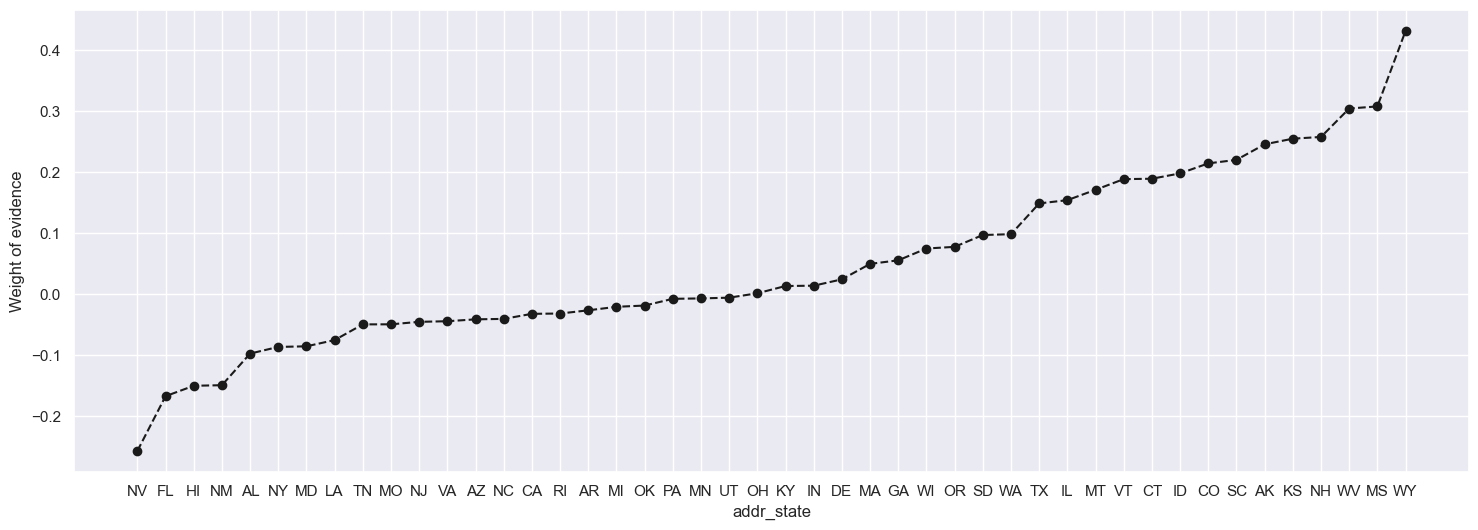

In [28]:
df_temp = woe_discreet(ldi_train.copy(),'addr_state',ldt_train)
plot_woe(df_temp.iloc[2:-2,:])

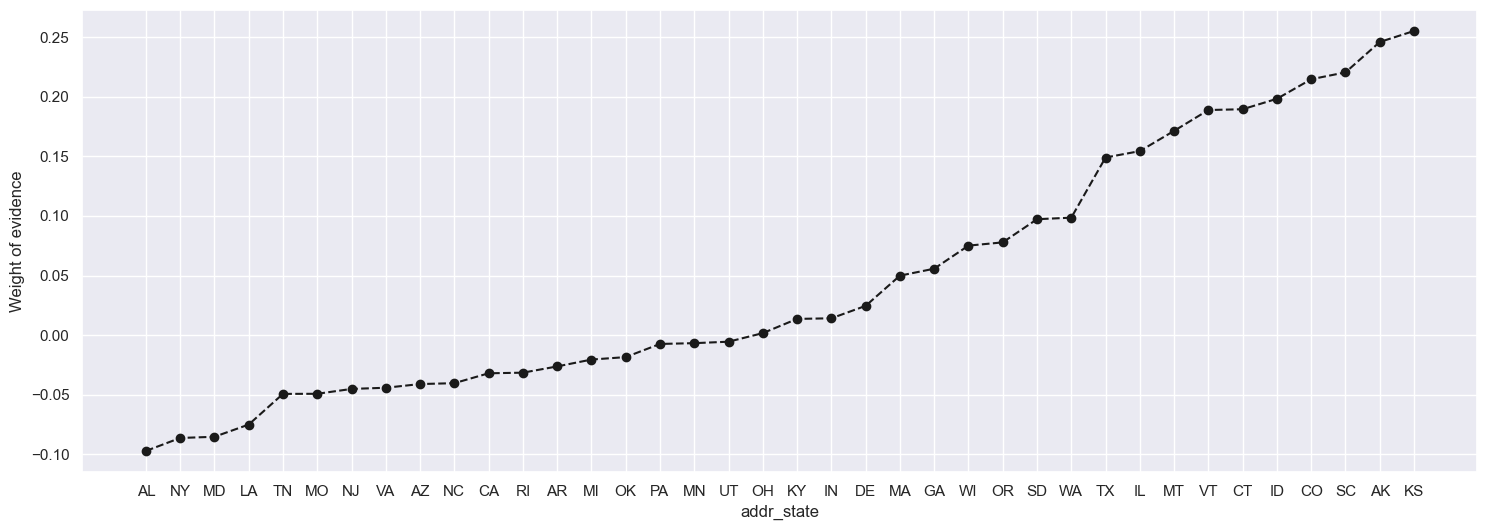

In [29]:
plot_woe(df_temp.iloc[6:-6,:])

In [30]:
ldi_train['addr_state:ND'] = 0
ldi_train['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([ldi_train['addr_state:ND'], ldi_train['addr_state:NE'],
                                                            ldi_train['addr_state:IA'], ldi_train['addr_state:NV'],
                                                             ldi_train['addr_state:FL'], ldi_train['addr_state:HI'],
                                                             ldi_train['addr_state:AL']])
ldi_train['addr_state:NM_VA'] = sum([ldi_train['addr_state:NM'], ldi_train['addr_state:VA']])
ldi_train['addr_state:OK_TN_MO_LA_MD_NC'] = sum([ldi_train['addr_state:OK'], ldi_train['addr_state:TN'],
                                                  ldi_train['addr_state:MO'], ldi_train['addr_state:LA'],
                                                  ldi_train['addr_state:MD'], ldi_train['addr_state:NC']])
ldi_train['addr_state:UT_KY_AZ_NJ'] = sum([ldi_train['addr_state:UT'], ldi_train['addr_state:KY'],
                                                ldi_train['addr_state:AZ'], ldi_train['addr_state:NJ']])
    
ldi_train['addr_state:AR_MI_PA_OH_MN'] = sum([ldi_train['addr_state:AR'], ldi_train['addr_state:MI'],
                                                  ldi_train['addr_state:PA'], ldi_train['addr_state:OH'],
                                                  ldi_train['addr_state:MN']])
    
ldi_train['addr_state:RI_MA_DE_SD_IN'] = sum([ldi_train['addr_state:RI'], ldi_train['addr_state:MA'],
                                               ldi_train['addr_state:DE'], ldi_train['addr_state:SD'],
                                                  ldi_train['addr_state:IN']])
ldi_train['addr_state:GA_WA_OR'] = sum([ldi_train['addr_state:GA'], ldi_train['addr_state:WA'],
                                                  ldi_train['addr_state:OR']])
    
ldi_train['addr_state:WI_MT'] = sum([ldi_train['addr_state:WI'], ldi_train['addr_state:MT']])
ldi_train['addr_state:IL_CT'] = sum([ldi_train['addr_state:IL'], ldi_train['addr_state:CT']])
ldi_train['addr_state:KS_SC_CO_VT_AK_MS'] = sum([ldi_train['addr_state:KS'], ldi_train['addr_state:SC'],
                                                  ldi_train['addr_state:CO'], ldi_train['addr_state:VT'],
                                                  ldi_train['addr_state:AK'], ldi_train['addr_state:MS']])
    
ldi_train['addr_state:WV_NH_WY_DC_ME_ID'] = sum([ldi_train['addr_state:WV'], ldi_train['addr_state:NH'],
                                                  ldi_train['addr_state:WY'], ldi_train['addr_state:DC'],
                                                  ldi_train['addr_state:ME'], ldi_train['addr_state:ID']])

In [31]:
ldi_test['addr_state:ND'] = 0
ldi_test['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([ldi_test['addr_state:ND'], ldi_test['addr_state:NE'],
                                                            ldi_test['addr_state:IA'], ldi_test['addr_state:NV'],
                                                             ldi_test['addr_state:FL'], ldi_test['addr_state:HI'],
                                                             ldi_test['addr_state:AL']])
ldi_test['addr_state:NM_VA'] = sum([ldi_test['addr_state:NM'], ldi_test['addr_state:VA']])
ldi_test['addr_state:OK_TN_MO_LA_MD_NC'] = sum([ldi_test['addr_state:OK'], ldi_test['addr_state:TN'],
                                                  ldi_test['addr_state:MO'], ldi_test['addr_state:LA'],
                                                  ldi_test['addr_state:MD'], ldi_test['addr_state:NC']])
ldi_test['addr_state:UT_KY_AZ_NJ'] = sum([ldi_test['addr_state:UT'], ldi_test['addr_state:KY'],
                                                ldi_test['addr_state:AZ'], ldi_test['addr_state:NJ']])
    
ldi_test['addr_state:AR_MI_PA_OH_MN'] = sum([ldi_test['addr_state:AR'], ldi_test['addr_state:MI'],
                                                  ldi_test['addr_state:PA'], ldi_test['addr_state:OH'],
                                                  ldi_test['addr_state:MN']])
    
ldi_test['addr_state:RI_MA_DE_SD_IN'] = sum([ldi_test['addr_state:RI'], ldi_test['addr_state:MA'],
                                               ldi_test['addr_state:DE'], ldi_test['addr_state:SD'],
                                                  ldi_test['addr_state:IN']])
ldi_test['addr_state:GA_WA_OR'] = sum([ldi_test['addr_state:GA'], ldi_test['addr_state:WA'],
                                                  ldi_test['addr_state:OR']])
    
ldi_test['addr_state:WI_MT'] = sum([ldi_test['addr_state:WI'], ldi_test['addr_state:MT']])
ldi_test['addr_state:IL_CT'] = sum([ldi_test['addr_state:IL'], ldi_test['addr_state:CT']])
ldi_test['addr_state:KS_SC_CO_VT_AK_MS'] = sum([ldi_test['addr_state:KS'], ldi_test['addr_state:SC'],
                                                  ldi_test['addr_state:CO'], ldi_test['addr_state:VT'],
                                                  ldi_test['addr_state:AK'], ldi_test['addr_state:MS']])
    
ldi_test['addr_state:WV_NH_WY_DC_ME_ID'] = sum([ldi_test['addr_state:WV'], ldi_test['addr_state:NH'],
                                                  ldi_test['addr_state:WY'], ldi_test['addr_state:DC'],
                                                  ldi_test['addr_state:ME'], ldi_test['addr_state:ID']])

In [32]:
ldi_train['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([ldi_train['purpose:educational'], ldi_train['purpose:small_business'],\
                                                                    ldi_train['purpose:wedding'], ldi_train['purpose:renewable_energy'],
                                                                     ldi_train['purpose:moving'], ldi_train['purpose:house']])
ldi_train['purpose:oth__med__vacation'] = sum([ldi_train['purpose:other'], ldi_train['purpose:medical'],
                                                 ldi_train['purpose:vacation']])
ldi_train['purpose:major_purch__car__home_impr'] = sum([ldi_train['purpose:major_purchase'], ldi_train['purpose:car'],
                                                            ldi_train['purpose:home_improvement']])

In [33]:
ldi_test['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([ldi_test['purpose:educational'], ldi_test['purpose:small_business'],\
                                                                    ldi_test['purpose:wedding'], ldi_test['purpose:renewable_energy'],
                                                                     ldi_test['purpose:moving'], ldi_test['purpose:house']])
ldi_test['purpose:oth__med__vacation'] = sum([ldi_test['purpose:other'], ldi_test['purpose:medical'],
                                                 ldi_test['purpose:vacation']])
ldi_test['purpose:major_purch__car__home_impr'] = sum([ldi_test['purpose:major_purchase'], ldi_test['purpose:car'],
                                                            ldi_test['purpose:home_improvement']])

In [34]:
def woe_continuos(df,discreet_variable_name,target_variable):
    
    df1 = pd.concat([ldi_train[discreet_variable_name],target_variable], axis =1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                    df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].mean()],axis=1)
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns[0],'n_obs','prop_good']
    df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
    df1['n_good'] = df1['prop_good']*df1['n_obs']
    df1['n_bad'] = (1-df1['prop_good'])*df1['n_obs']
    df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
    df1['woe'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
    #df1 = df1.sort_values(['woe'])
    #df1 = df1.reset_index(drop=True)
    df1['diff_woe'] = df1['woe'].diff().abs()
    df1['iv'] = (df1['prop_n_good']-df1['prop_n_bad'])*df1['woe']
    df1['iv'] = df1['iv'].sum()
    
    return df1

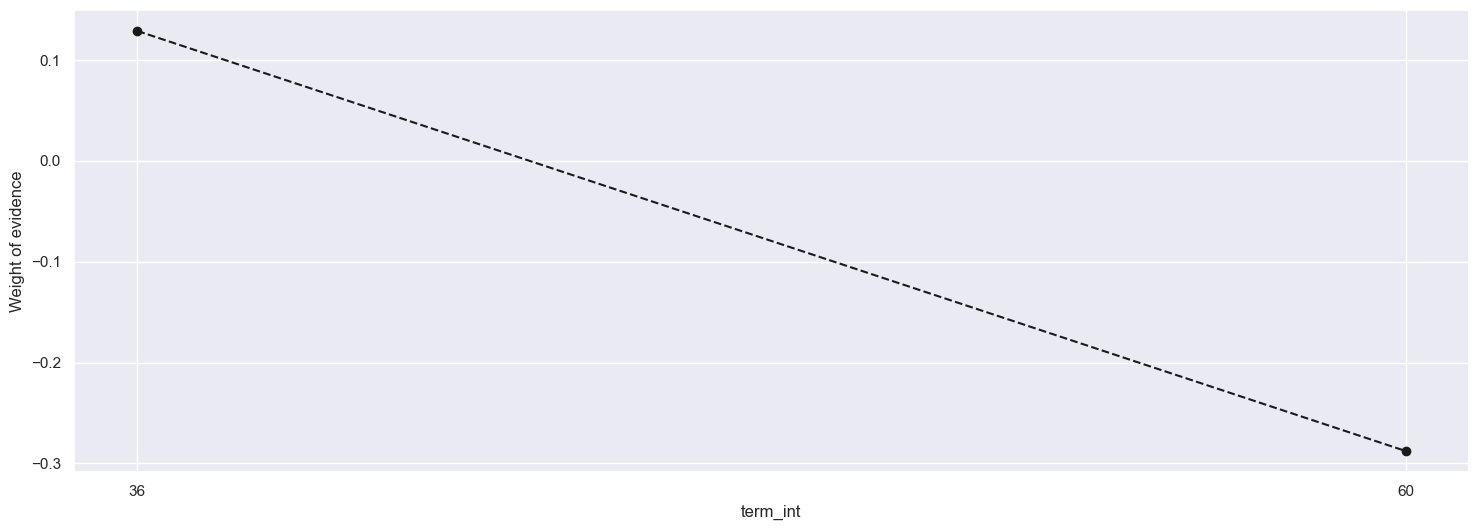

In [35]:
df_temp = woe_continuos(ldi_train.copy(),'term_int',ldt_train)
plot_woe(df_temp)

In [36]:
ldi_train['term:36'] = np.where(ldi_train['term_int']==36,1,0)
ldi_test['term:36'] = np.where(ldi_test['term_int']==36,1,0)
ldi_train['term:60'] = np.where(ldi_train['term_int']==60,1,0)
ldi_test['term:60'] = np.where(ldi_test['term_int']==60,1,0)

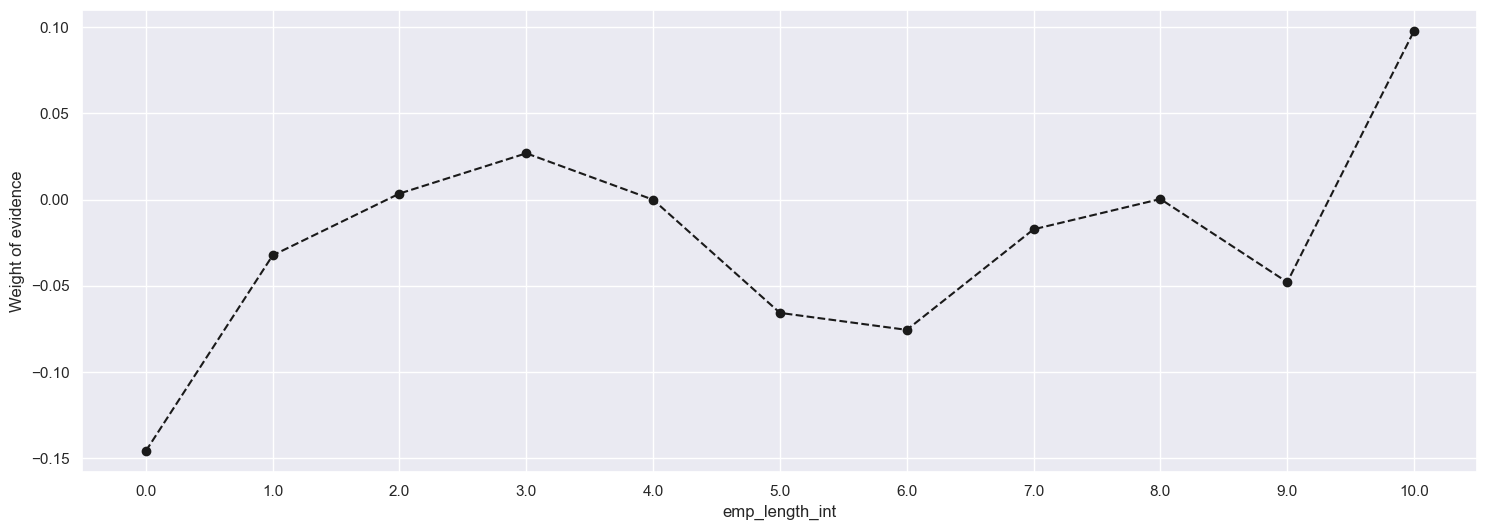

In [37]:
df_temp = woe_continuos(ldi_train.copy(),'emp_length_int',ldt_train)
plot_woe(df_temp)

In [38]:
ldi_train['emp_length_int:0'] = np.where(ldi_train['emp_length_int'].isin([0]),1,0)
ldi_test['emp_length_int:0'] = np.where(ldi_test['emp_length_int'].isin([0]),1,0)
ldi_train['emp_length_int:1'] = np.where(ldi_train['emp_length_int'].isin([1]),1,0)
ldi_test['emp_length_int:1'] = np.where(ldi_test['emp_length_int'].isin([1]),1,0)
ldi_train['emp_length_int:2-4'] = np.where(ldi_train['emp_length_int'].isin([2,3,4]),1,0)
ldi_test['emp_length_int:2-4'] = np.where(ldi_test['emp_length_int'].isin([2,3,4]),1,0)

ldi_train['emp_length_int:5-6'] = np.where(ldi_train['emp_length_int'].isin([5,6]),1,0)
ldi_test['emp_length_int:5-6'] = np.where(ldi_test['emp_length_int'].isin([5,6]),1,0)


ldi_train['emp_length_int:7-9'] = np.where(ldi_train['emp_length_int'].isin([7,8,9]),1,0)
ldi_test['emp_length_int:7-9'] = np.where(ldi_test['emp_length_int'].isin([7,8,9]),1,0)

ldi_train['emp_length_int:10'] = np.where(ldi_train['emp_length_int'].isin([10]),1,0)
ldi_test['emp_length_int:10'] = np.where(ldi_test['emp_length_int'].isin([10]),1,0)

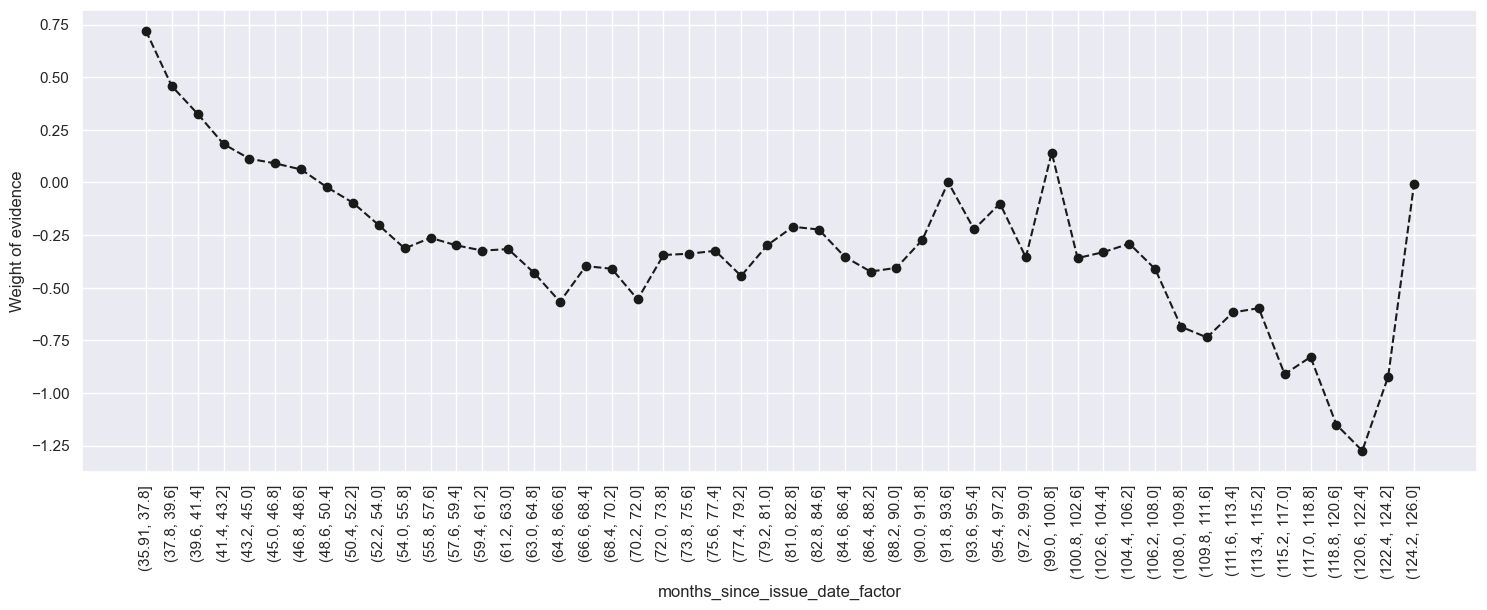

In [39]:
ldi_train['months_since_issue_date_factor'] = pd.cut(ldi_train['months_since_issue_d'],50)
ldi_train['months_since_issue_date_factor']
df_temp = woe_continuos(ldi_train.copy(),'months_since_issue_date_factor',ldt_train)
plot_woe(df_temp,90)

In [40]:
ldi_train['months_since_issue_d:<38'] = np.where(ldi_train['months_since_issue_d'].isin(range(38)), 1, 0)
ldi_train['months_since_issue_d:38-39'] = np.where(ldi_train['months_since_issue_d'].isin(range(38, 40)), 1, 0)
ldi_train['months_since_issue_d:40-41'] = np.where(ldi_train['months_since_issue_d'].isin(range(40, 42)), 1, 0)
ldi_train['months_since_issue_d:42-48'] = np.where(ldi_train['months_since_issue_d'].isin(range(42, 49)), 1, 0)
ldi_train['months_since_issue_d:49-52'] = np.where(ldi_train['months_since_issue_d'].isin(range(49, 53)), 1, 0)
ldi_train['months_since_issue_d:53-64'] = np.where(ldi_train['months_since_issue_d'].isin(range(53, 65)), 1, 0)
ldi_train['months_since_issue_d:65-84'] = np.where(ldi_train['months_since_issue_d'].isin(range(65, 85)), 1, 0)
ldi_train['months_since_issue_d:>84'] = np.where(ldi_train['months_since_issue_d'].isin(range(85, int(ldi_train['months_since_issue_d'].max()))), 1, 0)

In [41]:
ldi_test['months_since_issue_d:<38'] = np.where(ldi_test['months_since_issue_d'].isin(range(38)), 1, 0)
ldi_test['months_since_issue_d:38-39'] = np.where(ldi_test['months_since_issue_d'].isin(range(38, 40)), 1, 0)
ldi_test['months_since_issue_d:40-41'] = np.where(ldi_test['months_since_issue_d'].isin(range(40, 42)), 1, 0)
ldi_test['months_since_issue_d:42-48'] = np.where(ldi_test['months_since_issue_d'].isin(range(42, 49)), 1, 0)
ldi_test['months_since_issue_d:49-52'] = np.where(ldi_test['months_since_issue_d'].isin(range(49, 53)), 1, 0)
ldi_test['months_since_issue_d:53-64'] = np.where(ldi_test['months_since_issue_d'].isin(range(53, 65)), 1, 0)
ldi_test['months_since_issue_d:65-84'] = np.where(ldi_test['months_since_issue_d'].isin(range(65, 85)), 1, 0)
ldi_test['months_since_issue_d:>84'] = np.where(ldi_test['months_since_issue_d'].isin(range(85, int(ldi_test['months_since_issue_d'].max()))), 1, 0)

In [42]:
ldi_train['int_rate:<9.548'] = np.where((ldi_train['int_rate'] <= 9.548), 1, 0)
ldi_train['int_rate:9.548-12.025'] = np.where((ldi_train['int_rate'] > 9.548) & (ldi_train['int_rate'] <= 12.025), 1, 0)
ldi_train['int_rate:12.025-15.74'] = np.where((ldi_train['int_rate'] > 12.025) & (ldi_train['int_rate'] <= 15.74), 1, 0)
ldi_train['int_rate:15.74-20.281'] = np.where((ldi_train['int_rate'] > 15.74) & (ldi_train['int_rate'] <= 20.281), 1, 0)
ldi_train['int_rate:>20.281'] = np.where((ldi_train['int_rate'] > 20.281), 1, 0)

In [43]:
ldi_test['int_rate:<9.548'] = np.where((ldi_test['int_rate'] <= 9.548), 1, 0)
ldi_test['int_rate:9.548-12.025'] = np.where((ldi_test['int_rate'] > 9.548) & (ldi_test['int_rate'] <= 12.025), 1, 0)
ldi_test['int_rate:12.025-15.74'] = np.where((ldi_test['int_rate'] > 12.025) & (ldi_test['int_rate'] <= 15.74), 1, 0)
ldi_test['int_rate:15.74-20.281'] = np.where((ldi_test['int_rate'] > 15.74) & (ldi_test['int_rate'] <= 20.281), 1, 0)
ldi_test['int_rate:>20.281'] = np.where((ldi_test['int_rate'] > 20.281), 1, 0)

In [44]:
ldi_train['months_since_earliest_cr_line:<140'] = np.where(ldi_train['months_since_earliest_cr_line'].isin(range(140)), 
                                                               1, 0)
ldi_train['months_since_earliest_cr_line:141-164'] = np.where(ldi_train['months_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
ldi_train['months_since_earliest_cr_line:165-247'] = np.where(ldi_train['months_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
ldi_train['months_since_earliest_cr_line:248-270'] = np.where(ldi_train['months_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
ldi_train['months_since_earliest_cr_line:271-352'] = np.where(ldi_train['months_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
ldi_train['months_since_earliest_cr_line:>352'] = np.where(ldi_train['months_since_earliest_cr_line'].isin(range(353, int(ldi_train['months_since_earliest_cr_line'].max()))), 
                                                               1, 0)
    
ldi_train['delinq_2yrs:0'] = np.where((ldi_train['delinq_2yrs'] == 0), 1, 0)
ldi_train['delinq_2yrs:1-3'] = np.where((ldi_train['delinq_2yrs'] >= 1) & (ldi_train['delinq_2yrs'] <= 3),
                                              1, 0)
ldi_train['delinq_2yrs:>=4'] = np.where((ldi_train['delinq_2yrs'] >= 9), 1, 0)
   
# ldi_train['inq_last_6months:0'] = np.where((ldi_train['inq_last_6months'] == 0), 1, 0)
# ldi_train['inq_last_6months:1-2'] = np.where((ldi_train['inq_last_6months'] >= 1) & (ldi_train['inq_last_6months'] <= 2), 1, 0)
# ldi_train['inq_last_6months:3-6'] = np.where((ldi_train['inq_last_6months'] >= 3) & (ldi_train['inq_last_6months'] <= 6), 1, 0)
# ldi_train['inq_last_6months:>6'] = np.where((ldi_train['inq_last_6months'] > 6), 1, 0)
    
ldi_train['open_acc:0'] = np.where((ldi_train['open_acc'] == 0), 1, 0)
ldi_train['open_acc:1-3'] = np.where((ldi_train['open_acc'] >= 1) & (ldi_train['open_acc'] <= 3),
                                           1, 0)
ldi_train['open_acc:4-12'] = np.where((ldi_train['open_acc'] >= 4) & (ldi_train['open_acc'] <= 12),
                                            1, 0)
ldi_train['open_acc:13-17'] = np.where((ldi_train['open_acc'] >= 13) & (ldi_train['open_acc'] <= 17),
                                             1, 0)
ldi_train['open_acc:18-22'] = np.where((ldi_train['open_acc'] >= 18) & (ldi_train['open_acc'] <= 22),
                                             1, 0)
ldi_train['open_acc:23-25'] = np.where((ldi_train['open_acc'] >= 23) & (ldi_train['open_acc'] <= 25), 
                                             1, 0)
ldi_train['open_acc:26-30'] = np.where((ldi_train['open_acc'] >= 26) & (ldi_train['open_acc'] <= 30),
                                             1, 0)
ldi_train['open_acc:>=31'] = np.where((ldi_train['open_acc'] >= 31), 1, 0)
    
ldi_train['pub_rec:0-2'] = np.where((ldi_train['pub_rec'] >= 0) & (ldi_train['pub_rec'] <= 2), 1, 0)
ldi_train['pub_rec:3-4'] = np.where((ldi_train['pub_rec'] >= 3) & (ldi_train['pub_rec'] <= 4), 1, 0)
ldi_train['pub_rec:>=5'] = np.where((ldi_train['pub_rec'] >= 5), 1, 0)

ldi_train['total_acc:<=27'] = np.where((ldi_train['total_acc'] <= 27), 1, 0)
ldi_train['total_acc:28-51'] = np.where((ldi_train['total_acc'] >= 28) & (ldi_train['total_acc'] <= 51), 1, 0)
ldi_train['total_acc:>=52'] = np.where((ldi_train['total_acc'] >= 52), 1, 0)

ldi_train['acc_now_delinq:0'] = np.where((ldi_train['acc_now_delinq'] == 0), 1, 0)
ldi_train['acc_now_delinq:>=1'] = np.where((ldi_train['acc_now_delinq'] >= 1), 1, 0)
    
ldi_train['total_rev_hi_lim:<=5K'] = np.where((ldi_train['total_rev_hi_lim'] <= 5000), 1, 0)
ldi_train['total_rev_hi_lim:5K-10K'] = np.where((ldi_train['total_rev_hi_lim'] > 5000) & (ldi_train['total_rev_hi_lim'] <= 10000), 1, 0)
ldi_train['total_rev_hi_lim:10K-20K'] = np.where((ldi_train['total_rev_hi_lim'] > 10000) & (ldi_train['total_rev_hi_lim'] <= 20000), 1, 0)
ldi_train['total_rev_hi_lim:20K-30K'] = np.where((ldi_train['total_rev_hi_lim'] > 20000) & (ldi_train['total_rev_hi_lim'] <= 30000), 1, 0)
ldi_train['total_rev_hi_lim:30K-40K'] = np.where((ldi_train['total_rev_hi_lim'] > 30000) & (ldi_train['total_rev_hi_lim'] <= 40000), 1, 0)
ldi_train['total_rev_hi_lim:40K-55K'] = np.where((ldi_train['total_rev_hi_lim'] > 40000) & (ldi_train['total_rev_hi_lim'] <= 55000), 1, 0)
ldi_train['total_rev_hi_lim:55K-95K'] = np.where((ldi_train['total_rev_hi_lim'] > 55000) & (ldi_train['total_rev_hi_lim'] <= 95000), 1, 0)
ldi_train['total_rev_hi_lim:>95K'] = np.where((ldi_train['total_rev_hi_lim'] > 95000), 1, 0)    


In [45]:
ldi_test['months_since_earliest_cr_line:<140'] = np.where(ldi_test['months_since_earliest_cr_line'].isin(range(140)), 
                                                               1, 0)
ldi_test['months_since_earliest_cr_line:141-164'] = np.where(ldi_test['months_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
ldi_test['months_since_earliest_cr_line:165-247'] = np.where(ldi_test['months_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
ldi_test['months_since_earliest_cr_line:248-270'] = np.where(ldi_test['months_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
ldi_test['months_since_earliest_cr_line:271-352'] = np.where(ldi_test['months_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
ldi_test['months_since_earliest_cr_line:>352'] = np.where(ldi_test['months_since_earliest_cr_line'].isin(range(353, int(ldi_test['months_since_earliest_cr_line'].max()))), 
                                                               1, 0)
    
ldi_test['delinq_2yrs:0'] = np.where((ldi_test['delinq_2yrs'] == 0), 1, 0)
ldi_test['delinq_2yrs:1-3'] = np.where((ldi_test['delinq_2yrs'] >= 1) & (ldi_test['delinq_2yrs'] <= 3),
                                              1, 0)
ldi_test['delinq_2yrs:>=4'] = np.where((ldi_test['delinq_2yrs'] >= 9), 1, 0)
   
# ldi_test['inq_last_6months:0'] = np.where((ldi_test['inq_last_6months'] == 0), 1, 0)
# ldi_test['inq_last_6months:1-2'] = np.where((ldi_test['inq_last_6months'] >= 1) & (ldi_test['inq_last_6months'] <= 2), 1, 0)
# ldi_test['inq_last_6months:3-6'] = np.where((ldi_test['inq_last_6months'] >= 3) & (ldi_test['inq_last_6months'] <= 6), 1, 0)
# ldi_test['inq_last_6months:>6'] = np.where((ldi_test['inq_last_6months'] > 6), 1, 0)
    
ldi_test['open_acc:0'] = np.where((ldi_test['open_acc'] == 0), 1, 0)
ldi_test['open_acc:1-3'] = np.where((ldi_test['open_acc'] >= 1) & (ldi_test['open_acc'] <= 3),
                                           1, 0)
ldi_test['open_acc:4-12'] = np.where((ldi_test['open_acc'] >= 4) & (ldi_test['open_acc'] <= 12),
                                            1, 0)
ldi_test['open_acc:13-17'] = np.where((ldi_test['open_acc'] >= 13) & (ldi_test['open_acc'] <= 17),
                                             1, 0)
ldi_test['open_acc:18-22'] = np.where((ldi_test['open_acc'] >= 18) & (ldi_test['open_acc'] <= 22),
                                             1, 0)
ldi_test['open_acc:23-25'] = np.where((ldi_test['open_acc'] >= 23) & (ldi_test['open_acc'] <= 25), 
                                             1, 0)
ldi_test['open_acc:26-30'] = np.where((ldi_test['open_acc'] >= 26) & (ldi_test['open_acc'] <= 30),
                                             1, 0)
ldi_test['open_acc:>=31'] = np.where((ldi_test['open_acc'] >= 31), 1, 0)
    
ldi_test['pub_rec:0-2'] = np.where((ldi_test['pub_rec'] >= 0) & (ldi_test['pub_rec'] <= 2), 1, 0)
ldi_test['pub_rec:3-4'] = np.where((ldi_test['pub_rec'] >= 3) & (ldi_test['pub_rec'] <= 4), 1, 0)
ldi_test['pub_rec:>=5'] = np.where((ldi_test['pub_rec'] >= 5), 1, 0)

ldi_test['total_acc:<=27'] = np.where((ldi_test['total_acc'] <= 27), 1, 0)
ldi_test['total_acc:28-51'] = np.where((ldi_test['total_acc'] >= 28) & (ldi_test['total_acc'] <= 51), 1, 0)
ldi_test['total_acc:>=52'] = np.where((ldi_test['total_acc'] >= 52), 1, 0)

ldi_test['acc_now_delinq:0'] = np.where((ldi_test['acc_now_delinq'] == 0), 1, 0)
ldi_test['acc_now_delinq:>=1'] = np.where((ldi_test['acc_now_delinq'] >= 1), 1, 0)
    
ldi_test['total_rev_hi_lim:<=5K'] = np.where((ldi_test['total_rev_hi_lim'] <= 5000), 1, 0)
ldi_test['total_rev_hi_lim:5K-10K'] = np.where((ldi_test['total_rev_hi_lim'] > 5000) & (ldi_test['total_rev_hi_lim'] <= 10000), 1, 0)
ldi_test['total_rev_hi_lim:10K-20K'] = np.where((ldi_test['total_rev_hi_lim'] > 10000) & (ldi_test['total_rev_hi_lim'] <= 20000), 1, 0)
ldi_test['total_rev_hi_lim:20K-30K'] = np.where((ldi_test['total_rev_hi_lim'] > 20000) & (ldi_test['total_rev_hi_lim'] <= 30000), 1, 0)
ldi_test['total_rev_hi_lim:30K-40K'] = np.where((ldi_test['total_rev_hi_lim'] > 30000) & (ldi_test['total_rev_hi_lim'] <= 40000), 1, 0)
ldi_test['total_rev_hi_lim:40K-55K'] = np.where((ldi_test['total_rev_hi_lim'] > 40000) & (ldi_test['total_rev_hi_lim'] <= 55000), 1, 0)
ldi_test['total_rev_hi_lim:55K-95K'] = np.where((ldi_test['total_rev_hi_lim'] > 55000) & (ldi_test['total_rev_hi_lim'] <= 95000), 1, 0)
ldi_test['total_rev_hi_lim:>95K'] = np.where((ldi_test['total_rev_hi_lim'] > 95000), 1, 0)    


In [46]:
ldi_train['annual_inc:<20K'] = np.where((ldi_train['annual_inc'] <= 20000), 1, 0)
ldi_train['annual_inc:20K-30K'] = np.where((ldi_train['annual_inc'] > 20000) & (ldi_train['annual_inc'] <= 30000), 1, 0)
ldi_train['annual_inc:30K-40K'] = np.where((ldi_train['annual_inc'] > 30000) & (ldi_train['annual_inc'] <= 40000), 1, 0)
ldi_train['annual_inc:40K-50K'] = np.where((ldi_train['annual_inc'] > 40000) & (ldi_train['annual_inc'] <= 50000), 1, 0)
ldi_train['annual_inc:50K-60K'] = np.where((ldi_train['annual_inc'] > 50000) & (ldi_train['annual_inc'] <= 60000), 1, 0)
ldi_train['annual_inc:60K-70K'] = np.where((ldi_train['annual_inc'] > 60000) & (ldi_train['annual_inc'] <= 70000), 1, 0)
ldi_train['annual_inc:70K-80K'] = np.where((ldi_train['annual_inc'] > 70000) & (ldi_train['annual_inc'] <= 80000), 1, 0)
ldi_train['annual_inc:80K-90K'] = np.where((ldi_train['annual_inc'] > 80000) & (ldi_train['annual_inc'] <= 90000), 1, 0)
ldi_train['annual_inc:90K-100K'] = np.where((ldi_train['annual_inc'] > 90000) & (ldi_train['annual_inc'] <= 100000), 1, 0)
ldi_train['annual_inc:100K-120K'] = np.where((ldi_train['annual_inc'] > 100000) & (ldi_train['annual_inc'] <= 120000), 1, 0)
ldi_train['annual_inc:120K-140K'] = np.where((ldi_train['annual_inc'] > 120000) & (ldi_train['annual_inc'] <= 140000), 1, 0)
ldi_train['annual_inc:>140K'] = np.where((ldi_train['annual_inc'] > 140000), 1, 0) 
    
ldi_train['mths_since_last_delinq:Missing'] = np.where((ldi_train['mths_since_last_delinq'].isnull()), 1, 0)
ldi_train['mths_since_last_delinq:0-3'] = np.where((ldi_train['mths_since_last_delinq'] >= 0) & (ldi_train['mths_since_last_delinq'] <= 3), 1, 0)
ldi_train['mths_since_last_delinq:4-30'] = np.where((ldi_train['mths_since_last_delinq'] >= 4) & (ldi_train['mths_since_last_delinq'] <= 30), 1, 0)
ldi_train['mths_since_last_delinq:31-56'] = np.where((ldi_train['mths_since_last_delinq'] >= 31) & (ldi_train['mths_since_last_delinq'] <= 56), 1, 0)
ldi_train['mths_since_last_delinq:>=57'] = np.where((ldi_train['mths_since_last_delinq'] >= 57), 1, 0) 
    
ldi_train['dti:<=1.4'] = np.where((ldi_train['dti'] <= 1.4), 1, 0)
ldi_train['dti:1.4-3.5'] = np.where((ldi_train['dti'] > 1.4) & (ldi_train['dti'] <= 3.5), 1, 0)
ldi_train['dti:3.5-7.7'] = np.where((ldi_train['dti'] > 3.5) & (ldi_train['dti'] <= 7.7), 1, 0)
ldi_train['dti:7.7-10.5'] = np.where((ldi_train['dti'] > 7.7) & (ldi_train['dti'] <= 10.5), 1, 0)
ldi_train['dti:10.5-16.1'] = np.where((ldi_train['dti'] > 10.5) & (ldi_train['dti'] <= 16.1), 1, 0)
ldi_train['dti:16.1-20.3'] = np.where((ldi_train['dti'] > 16.1) & (ldi_train['dti'] <= 20.3), 1, 0)
ldi_train['dti:20.3-21.7'] = np.where((ldi_train['dti'] > 20.3) & (ldi_train['dti'] <= 21.7), 1, 0)
ldi_train['dti:21.7-22.4'] = np.where((ldi_train['dti'] > 21.7) & (ldi_train['dti'] <= 22.4), 1, 0)
ldi_train['dti:22.4-35'] = np.where((ldi_train['dti'] > 22.4) & (ldi_train['dti'] <= 35), 1, 0)
ldi_train['dti:>35'] = np.where((ldi_train['dti'] > 35), 1, 0) 
    
ldi_train['mths_since_last_record:Missing'] = np.where((ldi_train['mths_since_last_record'].isnull()), 1, 0)
ldi_train['mths_since_last_record:0-2'] = np.where((ldi_train['mths_since_last_record'] >= 0) & (ldi_train['mths_since_last_record'] <= 2), 1, 0)
ldi_train['mths_since_last_record:3-20'] = np.where((ldi_train['mths_since_last_record'] >= 3) & (ldi_train['mths_since_last_record'] <= 20), 1, 0)
ldi_train['mths_since_last_record:21-31'] = np.where((ldi_train['mths_since_last_record'] >= 21) & (ldi_train['mths_since_last_record'] <= 31), 1, 0)
ldi_train['mths_since_last_record:32-80'] = np.where((ldi_train['mths_since_last_record'] >= 32) & (ldi_train['mths_since_last_record'] <= 80), 1, 0)
ldi_train['mths_since_last_record:81-86'] = np.where((ldi_train['mths_since_last_record'] >= 81) & (ldi_train['mths_since_last_record'] <= 86), 1, 0)
ldi_train['mths_since_last_record:>=86'] = np.where((ldi_train['mths_since_last_record'] >= 86), 1, 0) 

C:\Users\HP\AppData\Local\Temp\ipykernel_21944\1217976282.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ldi_train['dti:22.4-35'] = np.where((ldi_train['dti'] > 22.4) & (ldi_train['dti'] <= 35), 1, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_21944\1217976282.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ldi_train['dti:>35'] = np.where((ldi_train['dti'] > 35), 1, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_21944\1217976282.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [47]:
ldi_test['annual_inc:<20K'] = np.where((ldi_test['annual_inc'] <= 20000), 1, 0)
ldi_test['annual_inc:20K-30K'] = np.where((ldi_test['annual_inc'] > 20000) & (ldi_test['annual_inc'] <= 30000), 1, 0)
ldi_test['annual_inc:30K-40K'] = np.where((ldi_test['annual_inc'] > 30000) & (ldi_test['annual_inc'] <= 40000), 1, 0)
ldi_test['annual_inc:40K-50K'] = np.where((ldi_test['annual_inc'] > 40000) & (ldi_test['annual_inc'] <= 50000), 1, 0)
ldi_test['annual_inc:50K-60K'] = np.where((ldi_test['annual_inc'] > 50000) & (ldi_test['annual_inc'] <= 60000), 1, 0)
ldi_test['annual_inc:60K-70K'] = np.where((ldi_test['annual_inc'] > 60000) & (ldi_test['annual_inc'] <= 70000), 1, 0)
ldi_test['annual_inc:70K-80K'] = np.where((ldi_test['annual_inc'] > 70000) & (ldi_test['annual_inc'] <= 80000), 1, 0)
ldi_test['annual_inc:80K-90K'] = np.where((ldi_test['annual_inc'] > 80000) & (ldi_test['annual_inc'] <= 90000), 1, 0)
ldi_test['annual_inc:90K-100K'] = np.where((ldi_test['annual_inc'] > 90000) & (ldi_test['annual_inc'] <= 100000), 1, 0)
ldi_test['annual_inc:100K-120K'] = np.where((ldi_test['annual_inc'] > 100000) & (ldi_test['annual_inc'] <= 120000), 1, 0)
ldi_test['annual_inc:120K-140K'] = np.where((ldi_test['annual_inc'] > 120000) & (ldi_test['annual_inc'] <= 140000), 1, 0)
ldi_test['annual_inc:>140K'] = np.where((ldi_test['annual_inc'] > 140000), 1, 0) 
    
ldi_test['mths_since_last_delinq:Missing'] = np.where((ldi_test['mths_since_last_delinq'].isnull()), 1, 0)
ldi_test['mths_since_last_delinq:0-3'] = np.where((ldi_test['mths_since_last_delinq'] >= 0) & (ldi_test['mths_since_last_delinq'] <= 3), 1, 0)
ldi_test['mths_since_last_delinq:4-30'] = np.where((ldi_test['mths_since_last_delinq'] >= 4) & (ldi_test['mths_since_last_delinq'] <= 30), 1, 0)
ldi_test['mths_since_last_delinq:31-56'] = np.where((ldi_test['mths_since_last_delinq'] >= 31) & (ldi_test['mths_since_last_delinq'] <= 56), 1, 0)
ldi_test['mths_since_last_delinq:>=57'] = np.where((ldi_test['mths_since_last_delinq'] >= 57), 1, 0) 
    
ldi_test['dti:<=1.4'] = np.where((ldi_test['dti'] <= 1.4), 1, 0)
ldi_test['dti:1.4-3.5'] = np.where((ldi_test['dti'] > 1.4) & (ldi_test['dti'] <= 3.5), 1, 0)
ldi_test['dti:3.5-7.7'] = np.where((ldi_test['dti'] > 3.5) & (ldi_test['dti'] <= 7.7), 1, 0)
ldi_test['dti:7.7-10.5'] = np.where((ldi_test['dti'] > 7.7) & (ldi_test['dti'] <= 10.5), 1, 0)
ldi_test['dti:10.5-16.1'] = np.where((ldi_test['dti'] > 10.5) & (ldi_test['dti'] <= 16.1), 1, 0)
ldi_test['dti:16.1-20.3'] = np.where((ldi_test['dti'] > 16.1) & (ldi_test['dti'] <= 20.3), 1, 0)
ldi_test['dti:20.3-21.7'] = np.where((ldi_test['dti'] > 20.3) & (ldi_test['dti'] <= 21.7), 1, 0)
ldi_test['dti:21.7-22.4'] = np.where((ldi_test['dti'] > 21.7) & (ldi_test['dti'] <= 22.4), 1, 0)
ldi_test['dti:22.4-35'] = np.where((ldi_test['dti'] > 22.4) & (ldi_test['dti'] <= 35), 1, 0)
ldi_test['dti:>35'] = np.where((ldi_test['dti'] > 35), 1, 0) 
    
ldi_test['mths_since_last_record:Missing'] = np.where((ldi_test['mths_since_last_record'].isnull()), 1, 0)
ldi_test['mths_since_last_record:0-2'] = np.where((ldi_test['mths_since_last_record'] >= 0) & (ldi_test['mths_since_last_record'] <= 2), 1, 0)
ldi_test['mths_since_last_record:3-20'] = np.where((ldi_test['mths_since_last_record'] >= 3) & (ldi_test['mths_since_last_record'] <= 20), 1, 0)
ldi_test['mths_since_last_record:21-31'] = np.where((ldi_test['mths_since_last_record'] >= 21) & (ldi_test['mths_since_last_record'] <= 31), 1, 0)
ldi_test['mths_since_last_record:32-80'] = np.where((ldi_test['mths_since_last_record'] >= 32) & (ldi_test['mths_since_last_record'] <= 80), 1, 0)
ldi_test['mths_since_last_record:81-86'] = np.where((ldi_test['mths_since_last_record'] >= 81) & (ldi_test['mths_since_last_record'] <= 86), 1, 0)
ldi_test['mths_since_last_record:>=86'] = np.where((ldi_test['mths_since_last_record'] >= 86), 1, 0) 

C:\Users\HP\AppData\Local\Temp\ipykernel_21944\1846913653.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ldi_test['dti:22.4-35'] = np.where((ldi_test['dti'] > 22.4) & (ldi_test['dti'] <= 35), 1, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_21944\1846913653.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ldi_test['dti:>35'] = np.where((ldi_test['dti'] > 35), 1, 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_21944\1846913653.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

In [48]:
train_data = ldi_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-52',
'months_since_issue_d:53-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
# 'inq_last_6mths:0',
# 'inq_last_6mths:1-2',
# 'inq_last_6mths:3-6',
# 'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [49]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'months_since_issue_d:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
# 'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [50]:
train_data = train_data.drop(ref_categories, axis = 1)
train_data.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,delinq_2yrs:0,delinq_2yrs:1-3,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:3-4,pub_rec:>=5,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
198115,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
281902,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
279905,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
353442,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
207316,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [51]:
from sklearn import linear_model
from sklearn import metrics
import scipy.stats as stat

In [52]:
class logit:
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values        

In [53]:
reg = logit()

In [54]:
pd.options.display.max_rows = None

In [55]:
reg.fit(train_data,ldt_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
reg.intercept_

array([-0.91138802])

In [57]:
reg.coef_

array([[ 1.18519085e+00,  9.67761177e-01,  7.16155128e-01,
         5.33979277e-01,  3.65525837e-01,  1.52812134e-01,
         7.23503360e-02,  9.56521765e-02,  6.72427504e-02,
         6.68325382e-02,  7.35971084e-02,  1.00155671e-01,
         8.53756556e-02,  1.34259001e-01,  1.11720862e-01,
         2.14163138e-01,  2.26278261e-01,  2.42904262e-01,
         2.69124582e-01,  3.57831329e-01,  5.00720797e-01,
         9.94239194e-02, -9.09470477e-04,  2.99917086e-01,
         1.88164655e-01,  2.11620875e-01,  2.52813332e-01,
         4.86791180e-02,  2.38919967e-02,  1.12567498e-01,
         1.44740495e-01,  8.60793705e-02,  7.36616630e-02,
         1.31399352e-01,  1.18073710e+00,  9.42369619e-01,
         8.46247191e-01,  6.17115741e-01,  4.77440857e-01,
         2.32167970e-01, -4.07420832e-02,  9.62017903e-01,
         6.03556250e-01,  3.44794443e-01,  1.32335082e-01,
         6.07842806e-02,  4.80518918e-02,  7.83804919e-02,
         1.11202761e-01,  1.51912846e-01,  8.64843329e-0

In [58]:
feature_name = train_data.columns.values

In [59]:
summary_table = pd.DataFrame(columns = ['Feature name'],data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values'] = np.append(np.nan,reg.p_values)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.911388,NaN
1,grade:A,1.185191,1.126224e-35
2,grade:B,0.967761,6.205927e-53
3,grade:C,0.716155,2.653596e-34
4,grade:D,0.533979,1.002701e-21
5,grade:E,0.365526,2.549606e-13
6,grade:F,0.152812,3.391059e-03
7,home_ownership:OWN,0.072350,4.930874e-04
8,home_ownership:MORTGAGE,0.095652,3.210806e-13
9,addr_state:NM_VA,0.067243,4.289807e-02


In [60]:
train_data = ldi_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-52',
'months_since_issue_d:53-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
# 'inq_last_6mths:0',
# 'inq_last_6mths:1-2',
# 'inq_last_6mths:3-6',
# 'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [61]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'months_since_issue_d:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
# 'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [62]:
train_data.drop(ref_categories, axis=1,inplace=True)
reg2 = logit()
reg2.fit(train_data,ldt_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
feature_name = train_data.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'],data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values'] = np.append(np.nan,reg2.p_values)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.968782,NaN
1,grade:A,1.182717,6.016259e-36
2,grade:B,0.965023,3.385408e-54
3,grade:C,0.714806,1.237148e-35
4,grade:D,0.535471,4.264655e-23
5,grade:E,0.371180,4.878895e-15
6,grade:F,0.159659,1.225063e-03
7,home_ownership:OWN,0.072189,4.948057e-04
8,home_ownership:MORTGAGE,0.090937,3.385570e-12
9,addr_state:NM_VA,0.073061,2.752666e-02


In [64]:
test_data = ldi_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-52',
'months_since_issue_d:53-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
# 'inq_last_6mths:0',
# 'inq_last_6mths:1-2',
# 'inq_last_6mths:3-6',
# 'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [65]:
test_data.drop(ref_categories,axis=1,inplace=True)
y_hat_test = reg2.model.predict(test_data)

In [66]:
y_hat_test_proba = reg2.model.predict_proba(test_data)[:][:,1]

In [67]:
df_actual_predicted = pd.concat([ldt_test.reset_index(drop=True),pd.DataFrame(y_hat_test_proba)],axis=1)
df_actual_predicted.columns = ['targets_test','y_hat_test_proba']
df_actual_predicted.index = ldt_test.index
df_actual_predicted.shape

(116572, 2)

In [68]:
tr = 0.9
df_actual_predicted['y_hat_test'] = np.where(df_actual_predicted['y_hat_test_proba']>tr,1,0)
pd.crosstab(df_actual_predicted['targets_test'],df_actual_predicted['y_hat_test'],
            rownames=['actual'],colnames=['predicted'])

predicted,0,1
actual,,
0,9272,3691
1,44658,58951


In [69]:
pd.crosstab(df_actual_predicted['targets_test'],df_actual_predicted['y_hat_test'],
            rownames=['actual'],colnames=['predicted'])/df_actual_predicted.shape[0]

predicted,0,1
actual,,
0,0.079539,0.031663
1,0.383094,0.505705


In [70]:
from sklearn.metrics import roc_curve,roc_auc_score

In [71]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted['targets_test'],df_actual_predicted['y_hat_test'])

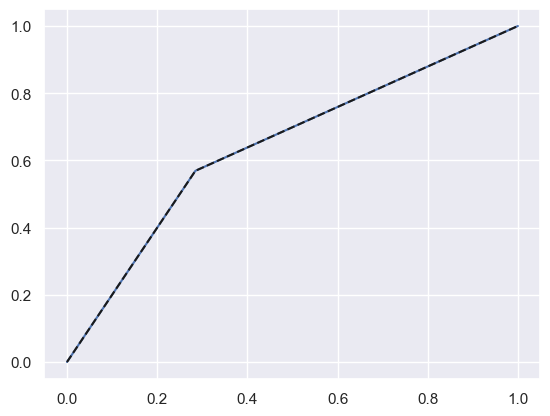

In [72]:
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,linestyle='--',color='k')

In [73]:
roc_auc_score(df_actual_predicted['targets_test'],df_actual_predicted['y_hat_test'])

0.6421210979734292

In [74]:
df_actual_predicted = df_actual_predicted.sort_values('y_hat_test_proba') 

In [75]:
df_actual_predicted.reset_index(inplace=True)

In [76]:
df_actual_predicted['Cumulative N Pop'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['targets_test'].cumsum()
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['Cumulative N Pop'] - df_actual_predicted['targets_test'].cumsum()
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Pop']/(df_actual_predicted.shape[0])
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good']/df_actual_predicted['targets_test'].sum()
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad']/(df_actual_predicted.shape[0] - df_actual_predicted['targets_test'].sum())

Text(0.5, 1.0, 'Gini')

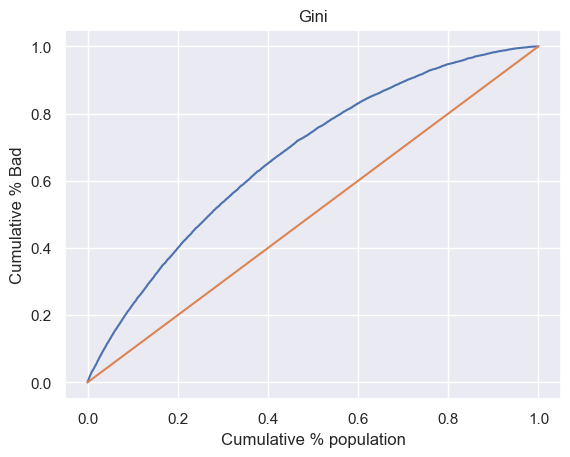

In [77]:
#Gini
plt.plot(df_actual_predicted['Cumulative Perc Population'],df_actual_predicted['Cumulative Perc Bad'])
plt.plot(df_actual_predicted['Cumulative Perc Population'],df_actual_predicted['Cumulative Perc Population'])
plt.xlabel('Cumulative % population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [78]:
Gini = roc_auc_score(df_actual_predicted['targets_test'],df_actual_predicted['y_hat_test'])*2-1
Gini

0.2842421959468584

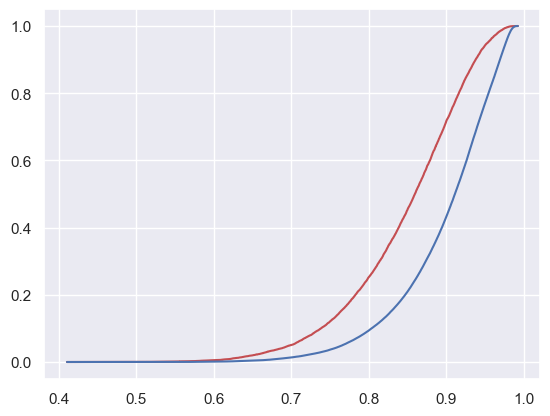

In [79]:
#K_S test
plt.plot(df_actual_predicted['y_hat_test_proba'],df_actual_predicted['Cumulative Perc Bad'],color = 'r')
plt.plot(df_actual_predicted['y_hat_test_proba'],df_actual_predicted['Cumulative Perc Good'],color = 'b')

In [80]:
KS = max(df_actual_predicted['Cumulative Perc Bad']-df_actual_predicted['Cumulative Perc Good'])
KS

0.28535761657171826